# Practice Midterm

### Instructions

**NOTE:** Real midterm instructions will be nearly identical, so you can save time by reading them here. Any differences on the real midterm will be in bold.)

Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Kernel$\rightarrow$Restart) and then run all cells (in the menubar, select Cell$\rightarrow$Run All).

Any `assert` statements are provided to check your answers. Unlike auto-graded sections in homework assignments, you may receive partial (or full) credit even if these code blocks fail, and you may not receive full credit even if they pass (e.g. if you hack them to pass). Problems without `assert` statements may have multiple correct solutions, and will be manually graded by instructors.

Make sure you fill in any place that says `YOUR CODE HERE`. Please also your name and official GT ID below.

In [ ]:
NAME = ""
GTID = "" #e.g. gburdell0

## Logistical Notes and Instructions

Failure to follow these instructions may negatively impact your grade.

* Your exam must be submitted prior to the timer ending on your Canvas quiz. **Accessing the Vocareum assignment after the timer expires or downloading the exam file without permission will be considered an honor code violation.** Vocareum logs record all access times and downloads.

* You have **90 minutes to complete the exam**, and you have 15 extra minutes to deal with any logistical issues that may arise. If you encounter unexpected technical issues please notify instructors immediately to establish a contingency plan.

* If you have issues or questions please contact instructors via a **private Canvas message**. Do not use any other means of communication during the exam. On the actual exam, instructors will monitor Canvas closely during the "office hours" (11am-12pm, 2-3pm, and 5-6pm EST) and as often as possible in between. It is strongly recommended that you begin the exam during one of these windows. 

* Instructors will **not answer questions related to content** in order to ensure a fair experience for everyone. In the case of ambiguities, typos, or possible errors you will be asked to use your best judgement, so **please restrict questions to technical issues that hinder your ability to complete the exam.**

* You may use any online resources or your own notes on the exam. However, you may not communicate with any of your classmates regarding the exam at any point during the exam time window. **Inappropriate communication will be considered an honor code violation.**

* Code blocks containing `assert` statements should not cause errors if the solution is correct, but you may submit the notebook for partial credit even if they raise errors.

* There are 3 main problems, each with sub-problems, that are worth a total of 100 points. Students in the 4745 section will receive 10 bonus points on the exam, but their total score cannot exceed 100%.

* Submit your exam through Vocareum when you are finished. You may push the submit button up to 20 times, so if you are feeling anxious you can submit at multiple points in the exam. Naturally, only the last submission will be graded.

## Data loading and description

In this exam you will work with the `diabetes` dataset from `scikit-learn`. You do not need to know anything about the details of this dataset, other than the following facts:

* The `X` matrix contains 10 features, each of which is a quantitative predictor for diabetes. Each feature has been scaled so that the mean is zero and the standard deviation is constant. The features will be called $[x_0, x_1, ... , x_9]$ for this problem.
* There are 442 samples in the `X` matrix. They are randomly ordered, so no data shuffling is necessary.
* The `y_regress` vector contains 442 quantitative indicators of diabetes, with higher numbers corresponding to a higher probability that a patient has diabetes.
* The `y_class` vector contains 442 class labels for whether or not a patient is diagnosed with diabetes, where a value of 1 corresponds to a diabetic patient and a value of -1 corresponds to a non-diabetic patient.

If you are interested in more details you can [read more about the data](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html) if you are interested, but no clinical knowledge of diabetes is necessary to solve the problems on this exam.

In [4]:
from sklearn.datasets import load_diabetes
import numpy as np
import pylab as plt

X, y_regress = load_diabetes(return_X_y=True)
y_class = 2*(y_regress > 160)-1

print('The dimensions of the data matrix are: {}'.format(X.shape))
print('The dimensions of the regression/classification vector are: {}'.format(y_regress.shape))

Matplotlib is building the font cache; this may take a moment.


The dimensions of the data matrix are: (442, 10)
The dimensions of the regression/classification vector are: (442,)


## Problem 1: Numerical Methods

This problem will test some basic understanding of linear algebra and programming. **For full credit you should not use any libraries other than the standard library and `numpy` in this problem.** However, you will receive partial credit if you are able to solve the problems using `scikit-learn` or other libraries.

## 1a: Construct an orthonormal version of the data matrix (15 points)

Name your matrix `X_ortho`. You can do this manually or with a for loop, but note that the for loop will require far fewer lines of code. The `assert` statements in the following codeblock will check that the resulting matrix is orthonormal. You do not need to understand how the assertion statement works, but if it runs successfully that is a good indicator that your solution is correct.

In [5]:
# YOUR CODE HERE
### BEGIN SOLUTION ###
X_original = X.copy() # make a copy since the routine over-writes X
X_ortho = [X[:, 0] / np.linalg.norm(X[:, 0], 2)] # normalize first column

for i in range(1, X.shape[1]): # loop through all columns
    gramSchmidt = X[:, i]
    
    for j in range(i): # loop through columns up to the current column
        gramSchmidt -= np.dot(X[:, i], X_ortho[j]) * X_ortho[j]
        
    X_ortho.append(gramSchmidt / np.linalg.norm(gramSchmidt, 2))

X_ortho = np.array(X_ortho).T # convert to numpy array and transpose
X = X_original # reset X to the original data
### END SOLUTION ###


In [6]:
assert np.isclose(X_ortho.T@X_ortho, np.eye(10)).all()

## 1b: Use every third datapoint from the original dataset to train a linear regression model (10 points).

Use the original data matrix (not the orthonormalized version, and not a kernel transform) and store the optimized weights in a vector called `w_OLS`. **You should add an intercept term to the linear regression model.** If the assertion statement does not cause an error then it is very likely that your solution is correct. For full credit you must do this using only basic `numpy` linear algebra functions, but you may re-use code from lectures and homework solutions.

In [7]:
# YOUR CODE HERE
X_intercept = np.hstack((X, np.ones((X.shape[0],1)))) #add column of ones for intercept
X_3rd = X_intercept[::3,:]
y_3rd = y_regress[::3]

A = X_3rd.T@X_3rd
b = X_3rd.T@y_3rd

w_OLS = np.linalg.solve(A, b)

In [8]:
assert np.isclose(np.linalg.norm(w_OLS), 1220.87)

## 1c: Compute the $r^2$ score for the linear regression model using the full dataset and the training dataset (10 points).

You should do this without using any built-in functions for full credit, but you can re-use code from lectures or homework solutions. As a reminder, the formula for $r^2$ is:

$r^2 = \frac{\sum_{i=0}^N (y_i - \bar{y})^2 - \sum_{i=0}^N (y_i - \hat{y}_i)^2}{\sum_{i=0}^N (y_i - \bar{y})^2}$

Store your results in variables called `r2_full` for the full dataset and `r2_3rd` for every 3rd point. The assertion statement will check that the results are correct.

In [9]:
# YOUR CODE HERE
def r2(y, yhat):
    ybar = np.mean(y)
    SST = np.sum((y-ybar)**2)
    SSE = np.sum((y-yhat)**2)
    return (SST - SSE)/SST

yhat_3rd = X_3rd@w_OLS
yhat = X_intercept@w_OLS

r2_3rd = r2(y_3rd, yhat_3rd)
r2_full = r2(y_regress, yhat)

In [10]:
assert np.isclose(r2_3rd*r2_full, 0.286766)

## Problem 2: Regression and cross-validation

This problem tests your understanding of regression and cross-validation. You may use any libraries, including `scikit-learn` for this problem. You should work with the original data matrix, rather than the orthogonalized version from Problem 1. The exact results you obtain may depend on randomized choices, so these problems will be graded based on the code rather than the results.

## 2a: Visualizing feature histograms (10 points)

Create a series of histogram plots for each of the 10 features.

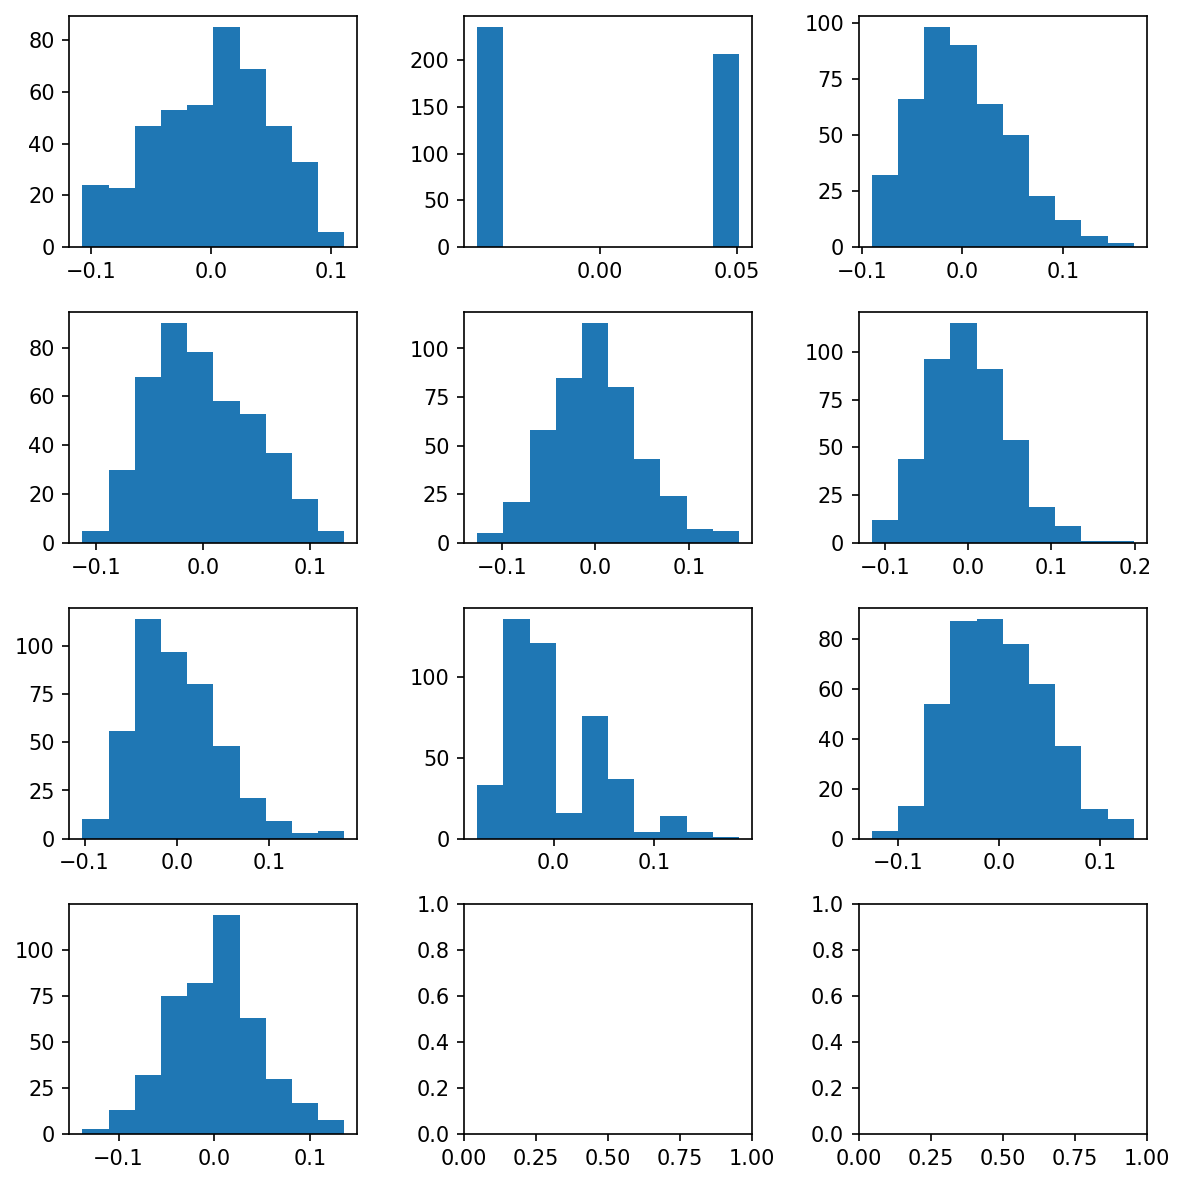

In [11]:
# YOUR CODE HERE
fig, axes = plt.subplots(4, 3, figsize = (8, 8), dpi = 150)
axes = axes.ravel()

for i in range(X.shape[1]): # iterate through columns
    axes[i].hist(X[:, i]) # Plot the histogram of i-th column of the X matrix
    
plt.tight_layout() # Makes the plot look nicer

## 2b: Optimize the hyperparameter of a LASSO model (15 points)

Create a LASSO model and find the optimum value of the regularization strength, `alpha`. You should ensure that the model is fitting an intercept, and use 5-fold cross-validation to identify the optimal hyperparameter. You do not need to use hold-out prior to hyperparameter optimization (i.e. no "train test split" is necessary). You can search over the following parameter ranges:

$\alpha \in [0.001, 0.005, 0.01, 0.05, 0.1]$

Store the optimum alpha value as `alpha_opt`.

In [13]:
# YOUR CODE HERE
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

alphas = [1e-3, 5e-3, 1e-2, 5e-2, 1e-1]
param_grid = {'alpha': alphas}

LASSO = Lasso(fit_intercept=True)

lasso_search = GridSearchCV(LASSO, param_grid, cv = 5)
lasso_search.fit(X, y_regress)
alpha_opt = lasso_search.best_estimator_.alpha

In [14]:
print("Optimum alpha for LASSO model: {}".format(alpha_opt))

Optimum alpha for LASSO model: 0.005


## 2c: Ensemble of LASSO models and k-Fold Sampling (15 points)

Use 5-fold cross validation to create an ensemble of 5 different LASSO models. Use the optimum value of `alpha`from the prior problem, and be sure to fit an intercept. If you were unable to complete the prior problem you can use `alpha=0.06`. For each model, print out the **$r^2$ score for the full dataset** and the **indices of any columns that are dropped from the model**.

*Note: The following code may be useful for printing the required information:*

`print("Model {}: r^2={}, dropped column indices={}".format(i, r2, dropped))`

*where `i` is the index of a given model corresponding to one of the train/test splits, `r2` is the $r^2$ score of the model, and `dropped` is a list of indices of all dropped columns. If you have trouble figuring out which columns are dropped you can just print the coefficients of the model for nearly full credit.*

In [15]:
# YOUR CODE HERE
from sklearn.model_selection import KFold

kfold = KFold(n_splits = 5, shuffle = True)

yhatList = []

i=0
for train_index, test_index in kfold.split(X):
    i += 1
    x_train, x_test = X[train_index], X[test_index]
    y_train, y_test = y_regress[train_index], y_regress[test_index]
    
    LASSO = Lasso(alpha = 0.05)
    LASSO.fit(x_train, y_train)
    r2 = LASSO.score(X, y_regress)
    coefs = LASSO.coef_
    dropped = np.array(range(X.shape[1]))[coefs==0]
    print("Model {}: r^2={}, dropped column indices={}".format(i, r2, dropped))

Model 1: r^2=0.5126809549656757, dropped column indices=[0 5]
Model 2: r^2=0.5058133972674519, dropped column indices=[0 5]
Model 3: r^2=0.5107519736727951, dropped column indices=[5 7]
Model 4: r^2=0.5111602793751564, dropped column indices=[0 5 7]
Model 5: r^2=0.5101766847510357, dropped column indices=[0 5]


# Problem 3: Classification

This problem will check for understanding of how a decision boundary is defined in a classification model, and will test your ability to optimize and evaluate a practical classification model. You may use any libraries, including `scikit-learn` for this problem. You will work with the `y_class` vector which uses class labels of [-1, 1] to identify whether or not a patient has diabetes (1) or not (-1).

## 3a: Plotting a decision boundary for a 2D logistic regression model (15 points)

In this problem you will work with only features $x_2$ and $x_3$ of the original dataset (`X[:, [2,3]`). You should train a logistic regression model with **no regularization and no cross-validation** and plot the resulting decision boundary. You may do this using optimization of the softmax loss function, or with `scikit-learn`. If you choose to use optimization, you can use an initial guess of `w0=[1,1,1]`. If you choose to use `scikit-learn` you will need to remove regularization by adjusting `C`, and can assume that 1e-10 $\approx$ 0.

*Hint: We recommend plotting $x_0$ on the x-axis and $x_1$ on the y-axis. The points should be color-coded by their class labels, and the decision boundary should appear as a solid line.*

[-0.40338484 22.05383958 14.2063332 ]


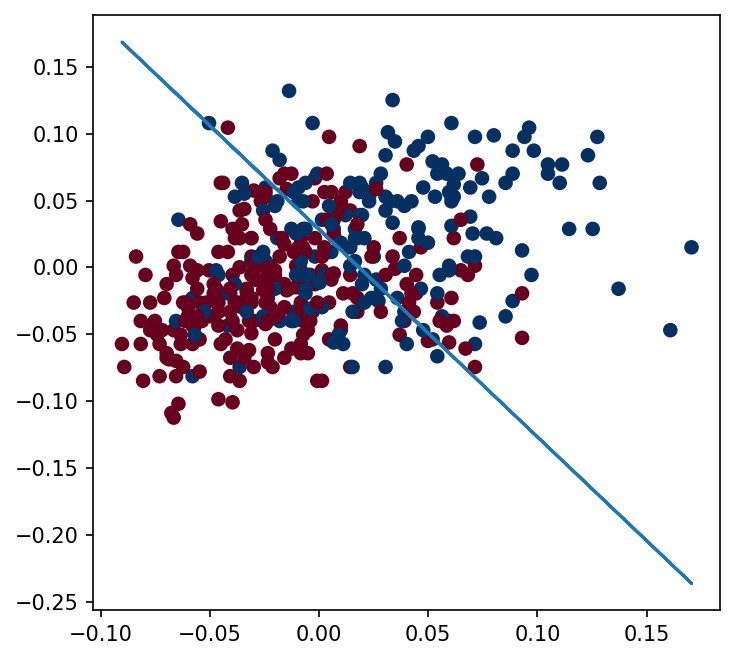

In [16]:
# YOUR CODE HERE
from scipy.optimize import minimize
X_2d = X[:, [2,3]]

def softmax_cost(w, X = X_2d, y = y_class):
    X_intercept = np.hstack((np.ones((X.shape[0],1)),X))
    Xb = np.dot(X_intercept, w)
    exp_yXb = np.exp(-y * Xb)
    return sum(np.log(1 + exp_yXb))


w0 = [1,1,1]
result = minimize(softmax_cost, w0, args = (X_2d, y_class))
w_logit = result.x
print(w_logit)

fig, ax = plt.subplots(figsize = (5, 4.5), dpi = 150)
ax.scatter(X_2d[:,0], X_2d[:,1], c=y_class, cmap='RdBu')

m = -w_logit[1] / w_logit[2]
b = -w_logit[0] / w_logit[2]
ax.plot(X_2d[:, 0], m*X_2d[:, 0] + b, ls = '-')

plt.tight_layout()

## 3b: Evaluating a support vector machine model (10 points)

Train a kernel support vector classification model for the full dataset, including all columns. Use the `rbf` kernel with `gamma=10` and `C=10`. Train the model on every second point, and report the accuracy, precision, and recall for the full dataset. As a reminder, accuracy, precision and recall are defined as:

* Accuracy = (number correct)/(total) = (TP + TN)/(TP + TN + FP + FN)
* Precision = TP/(TP + FP)
* Recall = TP/(TP + FN)

Store your answers in variables named `accuracy`, `precision`, and `recall`. If the assertion statement passes it means your solution is likely correct.

In [23]:
# YOUR CODE HERE
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score

svc = SVC(kernel = 'rbf', gamma = 10, C = 10)
svc.fit(X[::2], y_class[::2])
y_predict = svc.predict(X)

cm = confusion_matrix(y_class, y_predict)
tn, fp, fn, tp = cm.reshape(-1,)

accuracy = (tn + tp) / (tn + fp + fn + tp)
precision = tp / (tp + fp)
recall = tp / (tp + fn)

In [24]:
accuracy * precision * recall

0.42770794135558404

In [25]:
assert np.isclose(accuracy*precision*recall, 0.42770794135558404)

End of assignment. Any code appearing past this point will not be graded.